no use

### Using gradient descent to find solution

In [23]:
def polynomial_function_prime(x, m):
    """dy/dw, same as vandermonde_matrix(x, m)"""
    return np.array([x**i for i in range(m+1)]).T  # shape (N, M)

In [24]:
def get_gradient(pred, t, x, m):
    """
    not good to use gradient descent to optimize polynomial
    https://stats.stackexchange.com/questions/350130/why-is-gradient-descent-so-bad-at-optimizing-polynomial-regression
    """
    return np.dot((pred-t), polynomial_function_prime(x, m))

In [25]:
dE = get_gradient(t_hat, t, x, M)
dE

array([-0.725, -0.441, -0.338, -0.283])

In [26]:
def train_phase(x, t, w, m, step=10, lr=0.1):
    """use gradient descent update"""
    errors = []
    for _ in range(step):
        t_hat = polynomial_function(x, w, m)
        error_value = error_function(t_hat, t)
        w -= lr * get_gradient(t_hat, t, x, m)
        errors.append(error_value)
    return w, errors

In [27]:
all_w = []
all_errors = []
for lr in [0.1, 0.01, 0.001, 0.0001]:
    np.random.seed(seed)
    w = np.random.normal(5, 10, size=(M+1))
    w, error = train_phase(x, t, w, M, step=100, lr=lr)
    all_w.append(w)
    all_errors.append(error)

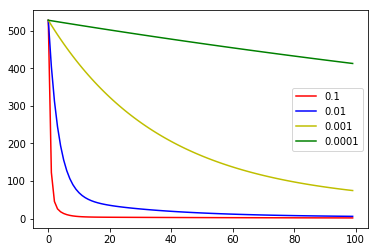

In [28]:
# to find optimal step for gradient descent
steps = np.arange(100)
for e, c, lr in zip(all_errors, ['r', 'b', 'y', 'g'], [0.1, 0.01, 0.001, 0.0001]):
    if e[-1] > 30000:
        continue
    plt.plot(steps, e, c=c, label=f"{lr}")
    plt.legend()
plt.show()

In [29]:
def get_rms_error(t_hat, t, n_sample, m):
    error = error_function(t_hat, t)
    rms = root_mean_square_error(error, n_sample)
    return rms

Train Error for M=0 is 20.3142 | rms_train: 0.6353 rms_test: 0.7221


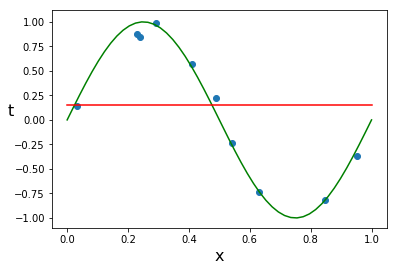

Train Error for M=1 is 13.8861 | rms_train: 0.4677 rms_test: 0.5137


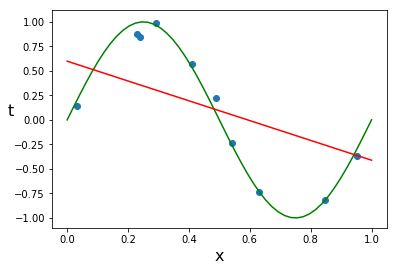

Train Error for M=2 is 12.0099 | rms_train: 0.4238 rms_test: 0.4704


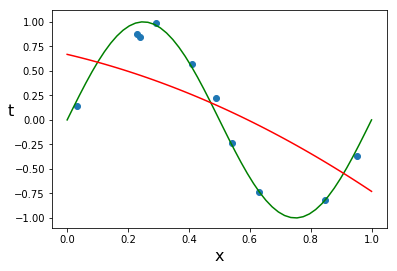

Train Error for M=3 is 14.1941 | rms_train: 0.4197 rms_test: 0.4560


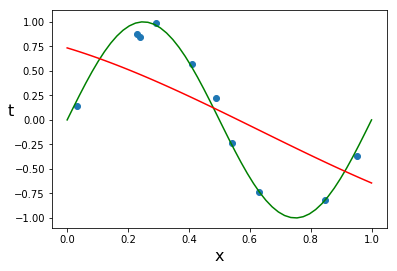

Train Error for M=4 is 12.5921 | rms_train: 0.4501 rms_test: 0.5166


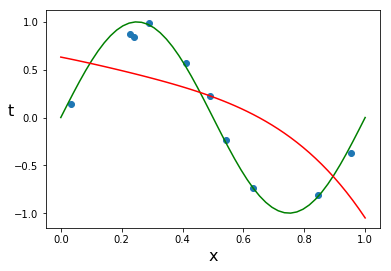

Train Error for M=5 is 12.1798 | rms_train: 0.4264 rms_test: 0.4787


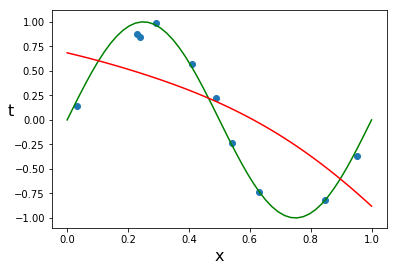

Train Error for M=6 is 14.2764 | rms_train: 0.4775 rms_test: 0.5581


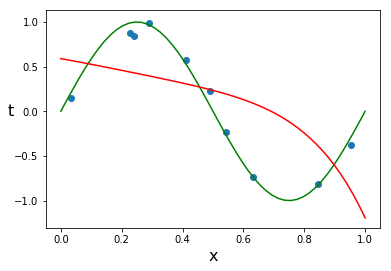

Train Error for M=7 is 13.6645 | rms_train: 0.4636 rms_test: 0.5360


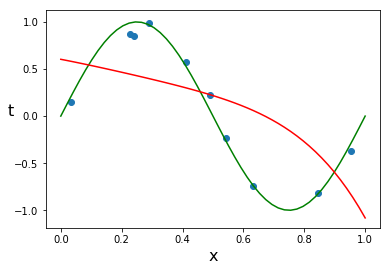

Train Error for M=8 is 15.3040 | rms_train: 0.4790 rms_test: 0.5598


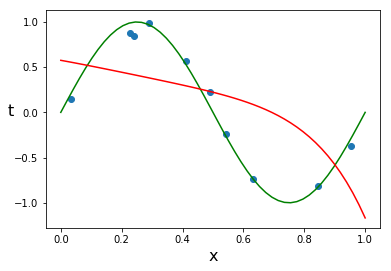

Train Error for M=9 is 11.8843 | rms_train: 0.4258 rms_test: 0.4717


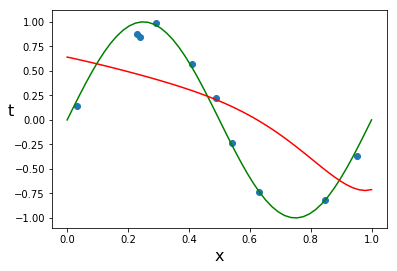

In [30]:
all_w = []
all_rms_train = []
all_rms_test = []
lr = 0.1

for m in range(10):
    np.random.seed(seed)
    w_raw = np.random.randn(m+1)
    optimal_w, train_error = train_phase(x, t, w_raw, m, step=10, lr=lr)
    
    t_hat = polynomial_function(x, optimal_w, m)
    t_hat_test = polynomial_function(x_test, optimal_w, m)
    
    rms_train = get_rms_error(t_hat, t, N, m)  # N=10
    rms_test = get_rms_error(t_hat_test, t_test, N_test, m)  # N_test = 100
    print(f"Train Error for M={m} is {np.sum(train_error):.4f} | rms_train: {rms_train:.4f} rms_test: {rms_test:.4f}")
    
    plt.plot(x_sin, t_sin, c="green")
    plt.plot(x_sin, polynomial_function(x_sin, optimal_w, m), c="red")
    plt.scatter(x, t)
    plt.xlabel('x', fontsize=16)
    plt.ylabel('t', rotation=0, fontsize=16)
    plt.show()
    
    all_w.append(optimal_w)
    all_rms_train.append(rms_train)
    all_rms_test.append(rms_test)

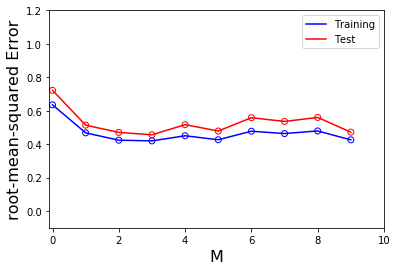

In [31]:
plt.scatter(np.arange(10), all_rms_train, facecolors='none', edgecolors='b')
plt.plot(np.arange(10), all_rms_train, c='b', label='Training')
plt.scatter(np.arange(len(all_rms_test)), all_rms_test, facecolors='none', edgecolors='r')
plt.plot(np.arange(len(all_rms_test)), all_rms_test, c='r', label='Test')
plt.legend()
plt.xlim((-0.1, 10))
plt.ylim((-0.1, 1.2))
plt.ylabel("root-mean-squared Error", fontsize=16)
plt.xlabel("M", fontsize=16)
plt.show()

In [1]:
import torch

In [ ]:
# input_dim, hidden_dim, num_layers